<a href="https://colab.research.google.com/github/daksh-2212/Projects/blob/main/Breast_Cancer_classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Importing Libraries*

BREAST CANCER DETECTION USING VARIOUS MACHINEA LEARNING ALGORITHMS


In [ ]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array
from matplotlib import pyplot

### *Choose Dataset from Local Directory*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BC_DATA.csv to BC_DATA (1).csv


### *Load Dataset*

In [ ]:
dataset = pd.read_csv('BC_DATA.csv')

### *Summarize Dataset*

In [ ]:
print(dataset.shape)
print(dataset.head(5))

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

### *Mapping Class String Values to Numbers*

In [ ]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.2776

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [ ]:
X = dataset.iloc[:, 2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
Y = dataset.iloc[:,1].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
dataset.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


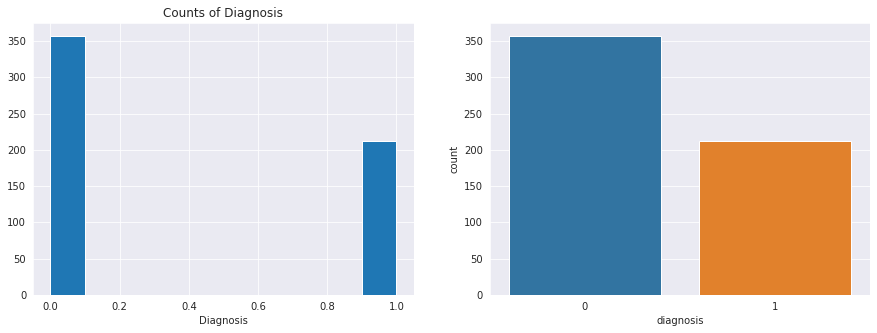

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.hist(dataset.diagnosis)
#plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")

plt.subplot(1,2,2)
sns.countplot('diagnosis',data=dataset);
plt.show()

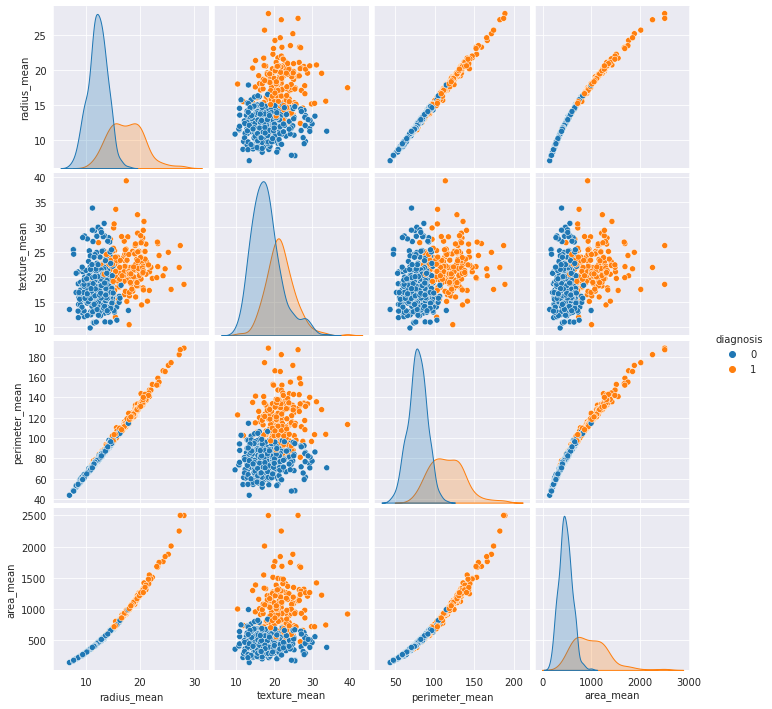

In [ ]:
cols=["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean"]

sns.pairplot(dataset[cols],hue="diagnosis")
plt.show()

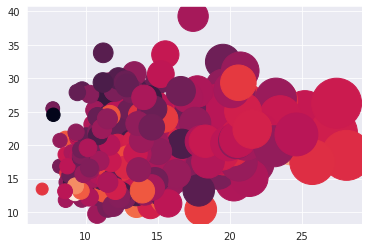

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("BC_DATA.csv")
plt.scatter(data['radius_mean'],data['texture_mean'],data['area_mean'],data['smoothness_mean'])

In [ ]:
#here finding the correlation between the mean features of data set only
cols=['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean']
print(len(cols))
dataset[cols].corr()

10


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000


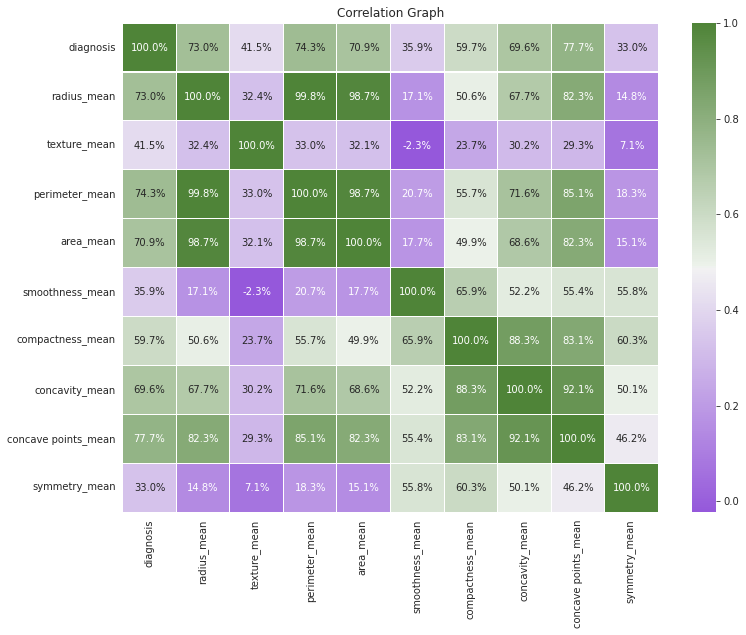

In [ ]:
plt.figure(figsize=(12,9))

plt.title("Correlation Graph")
cmap = sns.diverging_palette(1000,120,as_cmap=True)

sns.heatmap(dataset[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [ ]:
plt.figure(figsize=(15,10))
fig = px.imshow(dataset[cols].corr());
fig.show()

<Figure size 1080x720 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### *Validating some ML algorithm by its accuracy - Model Score*

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='saga', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

LR: 0.981285
LDA: 0.957863
KNN: 0.964839
CART: 0.931949
NB: 0.941417
SVM: 0.979014


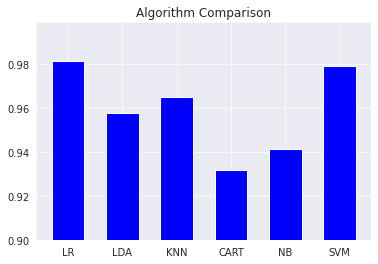

In [ ]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

pyplot.ylim(.900, .999)
pyplot.bar(names, res, color ='blue', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()

### *Training & Prediction using the algorithm with high accuracy*

In [ ]:
from sklearn.linear_model import LogisticRegression
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

NameError: ignored

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[88  2]
 [ 3 50]]


In [ ]:
import pandas as pd 

y_test= pd.Series(y_test, name='Actual')
y_pred=pd.Series(y_pred,name='Predicted')

#create confusion matrix
print(pd.crosstab(y_test,y_pred))

Predicted   0   1
Actual           
0          88   2
1           3  50


In [ ]:
#printing accuracy of model
print(metrics.accuracy_score(y_test, y_pred))

0.965034965034965


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test, y_pred))


0.9615384615384616


In [ ]:
#print recall value of model
print(metrics.recall_score(y_test, y_pred))


0.9433962264150944


ACCURACY SCORE

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:{0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy:96.5034965034965%


Cross Validatiuon Score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold= KFold(n_splits=10, shuffle=True ,random_state=100 )
result = cross_val_score(model, X, Y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

CROSS VALIDATION SCORE: 62.73%



Stratified K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3, shuffle=True,random_state=100)
model_skfold= LogisticRegression()
results_skfold= cross_val_score(model_skfold ,X,Y,cv=skfold)
print("STRATIFIED K-FOLD SCORE: %.2f%%" %(results_skfold.mean()*100.0))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



STRATIFIED K-FOLD SCORE: 94.20%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#define the predictor variables and the response variable
X =  dataset.iloc[:, 2:32].values
Y = dataset.iloc[:,1].values

#split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

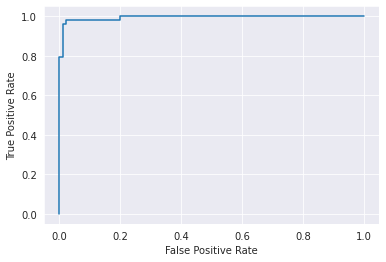

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()